In [257]:
import sklearn
import pickle
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [258]:
pd.set_option('display.max_columns', None)

In [259]:
df = pd.read_csv('dataset/dataset.csv')

In [260]:
df.shape

(64461, 61)

In [261]:
df.head(2)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4


### Processamento

#### Engenharia de atributos e limpeza de dados

In [262]:
# verificando a porcentagem de valores nulos
df.isna().sum() / df.shape[0] * 100

Respondent             0.000000
MainBranch             0.463846
Hobbyist               0.069810
Age                   29.498456
Age1stCode            10.178247
                        ...    
WebframeWorkedWith    34.411505
WelcomeChange         18.271513
WorkWeekHrs           36.161400
YearsCode             10.513334
YearsCodePro          28.097609
Length: 61, dtype: float64

In [263]:
# selecionando variaveis de acordo com o requisito do projeto
df_selected = df[['Country', 'DevType', 'EdLevel', 'YearsCodePro', 'Employment', 'ConvertedComp']].copy()

In [264]:
df_selected.rename(columns={'ConvertedComp': 'Salary'}, inplace=True)

In [265]:
df_selected.columns

Index(['Country', 'DevType', 'EdLevel', 'YearsCodePro', 'Employment',
       'Salary'],
      dtype='object')

In [266]:
# como queremos saber o salario dos desenvolvedores, vamos remover os valores nulos da variavel 'Salary'
df_selected.dropna(subset=['Salary'], inplace=True)
df_selected.shape

(34756, 6)

In [267]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34756 entries, 7 to 64154
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   DevType       34367 non-null  object 
 2   EdLevel       34188 non-null  object 
 3   YearsCodePro  34621 non-null  object 
 4   Employment    34717 non-null  object 
 5   Salary        34756 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.9+ MB


In [268]:
df_selected.dropna(inplace=True)
df_selected.shape

(33696, 6)

In [269]:
# verificando a distribuicao dos dados da variavel 'Employment'
df_selected['Employment'].value_counts()

Employment
Employed full-time                                      29722
Independent contractor, freelancer, or self-employed     2977
Employed part-time                                        997
Name: count, dtype: int64

In [270]:
# como os valores são discrepantes, vamos remover os valores 'Independent contractor, freelancer, or self-employed ' 
# e também os valores 'Employed part-time'

df_filtered = df_selected[df_selected['Employment'] == 'Employed full-time'].copy()

# agora removemos a variavel 'Employment' pois só temos um valor
df_filtered.drop('Employment', axis=1, inplace=True)

In [271]:
# Verificando a variavel categorico 'DevType'
df_filtered['DevType'].unique()

array(['Developer, back-end;Developer, desktop or enterprise applications;Developer, game or graphics',
       'Database administrator;Developer, full-stack;Developer, mobile',
       'Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end',
       ...,
       'Developer, back-end;Developer, front-end;Developer, full-stack;DevOps specialist;Engineer, data;Engineering manager',
       'Database administrator;Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;Engineer, data;Engineering manager;System administrator',
       'Developer, full-stack;Developer, QA or test;System administrator'],
      dtype=object)

In [272]:
df_dummies = pd.get_dummies(df['DevType'].str.split(';').explode()).astype(int)
df_grouped = df_dummies.groupby(df_dummies.index).sum()

df_merged = df_filtered.drop('DevType', axis=1).join(df_grouped)

In [273]:
df_merged.head(4)

,Country,EdLevel,YearsCodePro,Salary,Academic researcher,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,"Developer, QA or test","Developer, back-end","Developer, desktop or enterprise applications","Developer, embedded applications or devices","Developer, front-end","Developer, full-stack","Developer, game or graphics","Developer, mobile",Educator,"Engineer, data","Engineer, site reliability",Engineering manager,Marketing or sales professional,Product manager,Scientist,Senior executive/VP,System administrator
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,116000.0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,32315.0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,40070.0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
11,Spain,Some college/university study without earning ...,7,14268.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


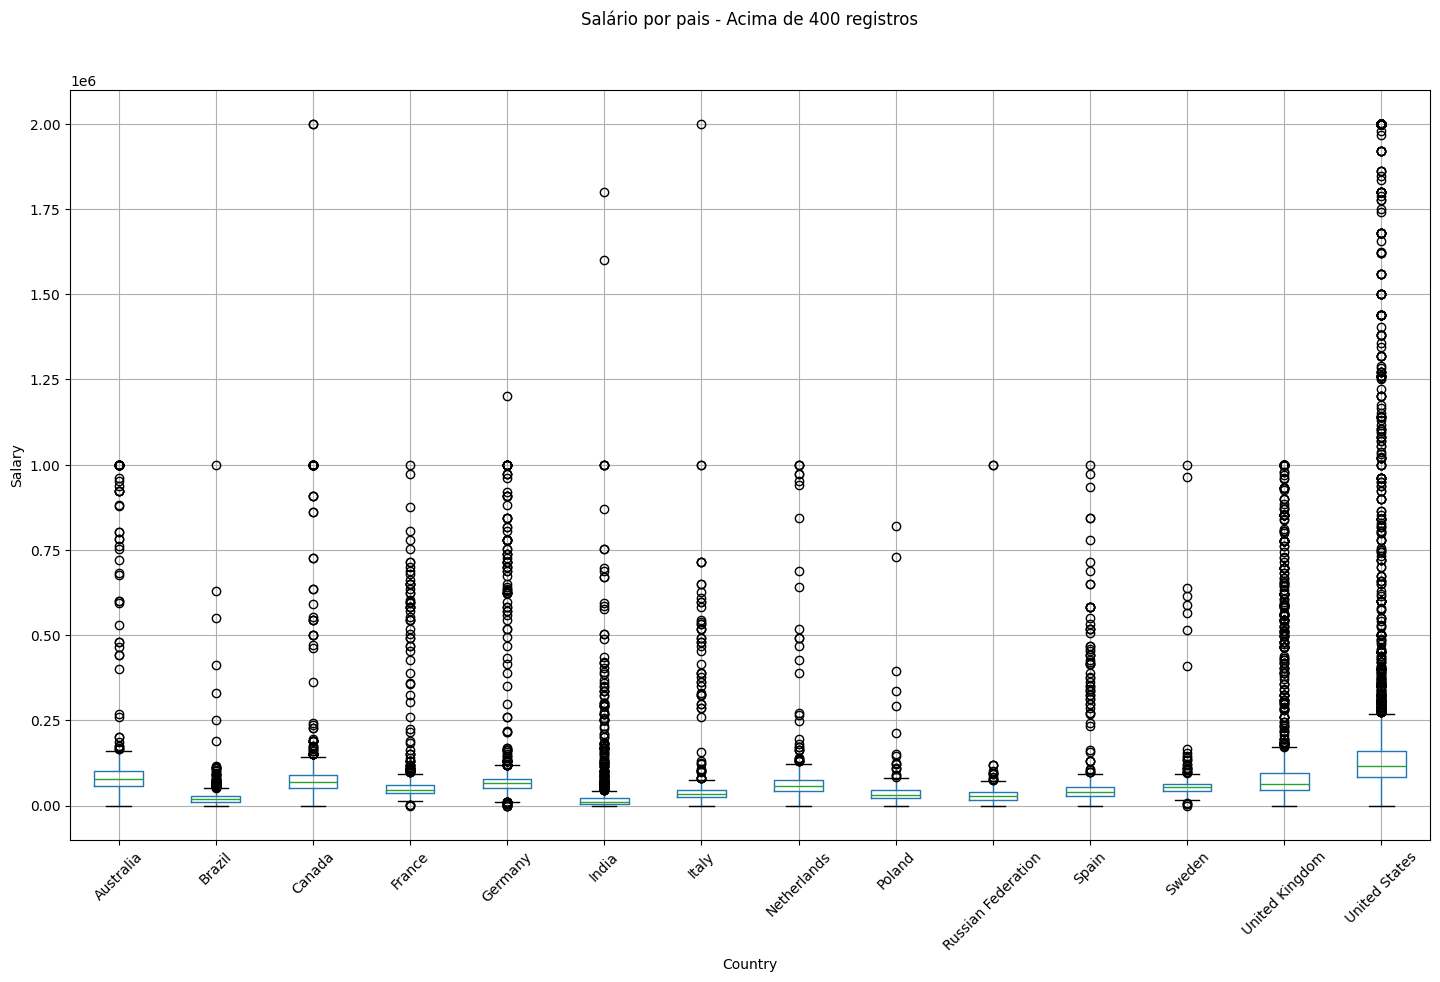

In [274]:
# plot
counts = df_merged['Country'].value_counts()
df_country = df_merged[df_merged['Country'].isin(counts[counts >= 400].index)]

fig, ax = plt.subplots(1, 1, figsize=(17, 10))
df_country.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salário por pais - Acima de 400 registros')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

In [275]:
df_filtered = df_merged[df_merged['Salary'].between(5000, 250000)]

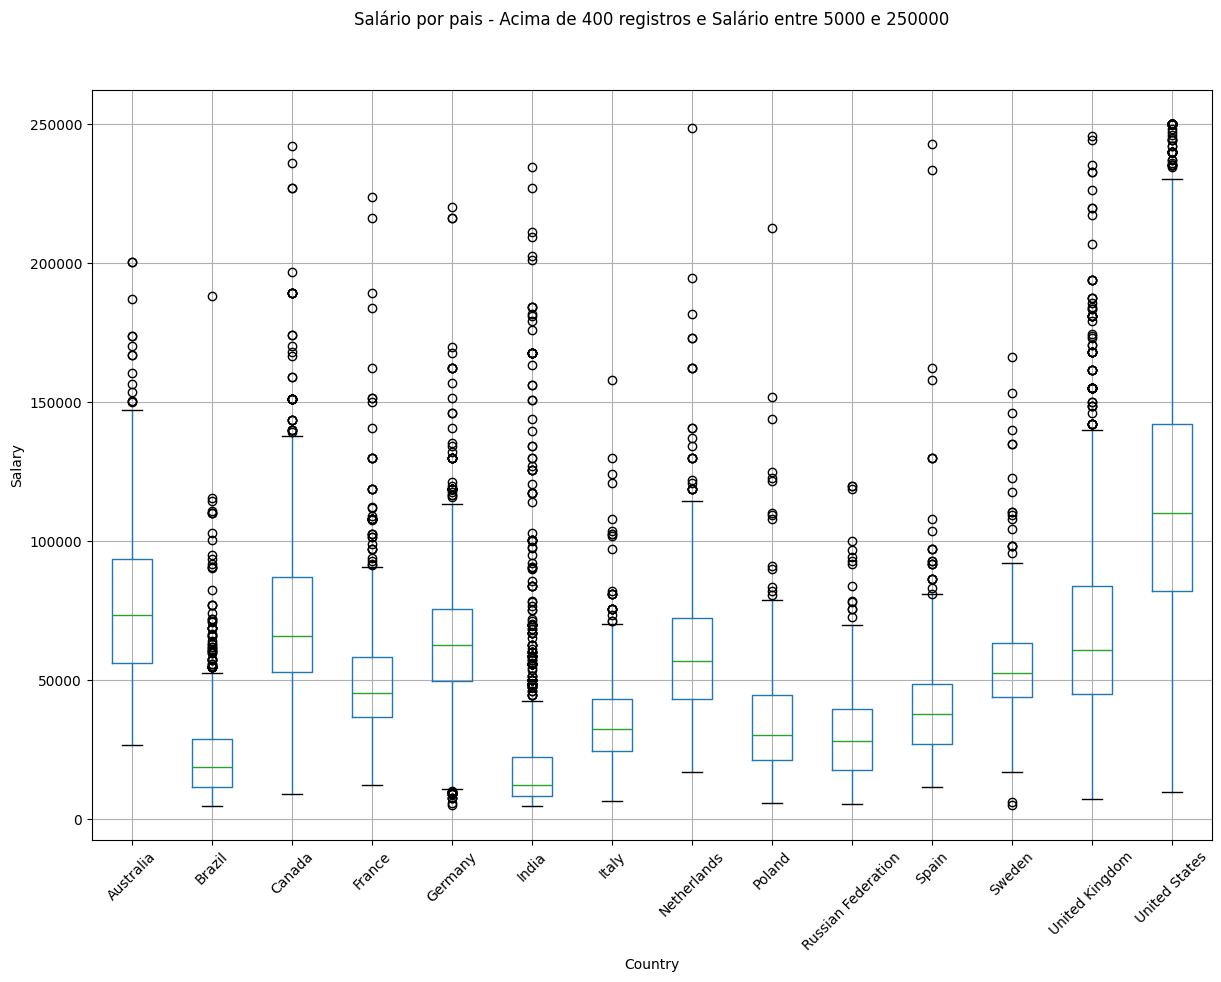

In [276]:
# plot
counts = df_filtered['Country'].value_counts()
df_country = df_filtered[df_filtered['Country'].isin(counts[counts >= 400].index)]

fig, ax = plt.subplots(1, 1, figsize=(14, 10))
df_country.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salário por pais - Acima de 400 registros e Salário entre 5000 e 250000')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

In [277]:
# verificando anos de experiencia
df_filtered['YearsCodePro'].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '14', '12', '29', '6',
       '28', '8', '23', '15', '25', '5', '9', '11', 'Less than 1 year',
       '21', '16', '18', '32', '19', '22', '38', '30', '26', '17', '27',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49', '47'],
      dtype=object)

In [278]:
# temos registros como texto, precisamos tratar

mapeamento = {
    "Less than 1 year": 0,
    "More than 50 years": 51
}
df_filtered.loc[df_filtered.index, 'YearsCodePro'] = df_filtered['YearsCodePro'].map(mapeamento).fillna(df_filtered['YearsCodePro']).astype(int)

df_filtered['YearsCodePro'].unique()

array([13, 4, 2, 7, 20, 1, 3, 10, 14, 12, 29, 6, 28, 8, 23, 15, 25, 5, 9,
       11, 0, 21, 16, 18, 32, 19, 22, 38, 30, 26, 17, 27, 24, 34, 35, 33,
       36, 40, 39, 51, 31, 37, 41, 45, 42, 44, 43, 50, 49, 47],
      dtype=object)

In [279]:
# Verificando nível de educação 

df_filtered['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [280]:
# agrupando
mapeamento = {
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor’s degree',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)' : 'Master’s degree',
    'Professional degree (JD, MD, etc.)': 'Post grad',
    'Other doctoral degree (Ph.D., Ed.D., etc.)': 'Post grad',
}

df_filtered.loc[df_filtered.index, 'EdLevel'] = df_filtered['EdLevel'].map(mapeamento).fillna('Less than a Bachelors')
df_filtered['EdLevel'].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [281]:
# transformando em representação numérica

ord_ed_level = OrdinalEncoder(categories=[
    ['Less than a Bachelors',
    'Bachelor’s degree', 
    'Master’s degree',
    'Post grad']
],  dtype=np.int8)

df_filtered.loc[df_filtered.index, 'EdLevel'] = ord_ed_level.fit_transform(df_filtered[['EdLevel']])

In [282]:
# verificando os paises
ord_country = OrdinalEncoder(dtype=np.int16)

df_filtered.loc[df_filtered.index, 'Country'] = ord_country.fit_transform(df_filtered[['Country']])
df_filtered.head(2)

,Country,EdLevel,YearsCodePro,Salary,Academic researcher,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,"Developer, QA or test","Developer, back-end","Developer, desktop or enterprise applications","Developer, embedded applications or devices","Developer, front-end","Developer, full-stack","Developer, game or graphics","Developer, mobile",Educator,"Engineer, data","Engineer, site reliability",Engineering manager,Marketing or sales professional,Product manager,Scientist,Senior executive/VP,System administrator
7,144,1,13,116000.0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,142,2,4,32315.0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


<Axes: >

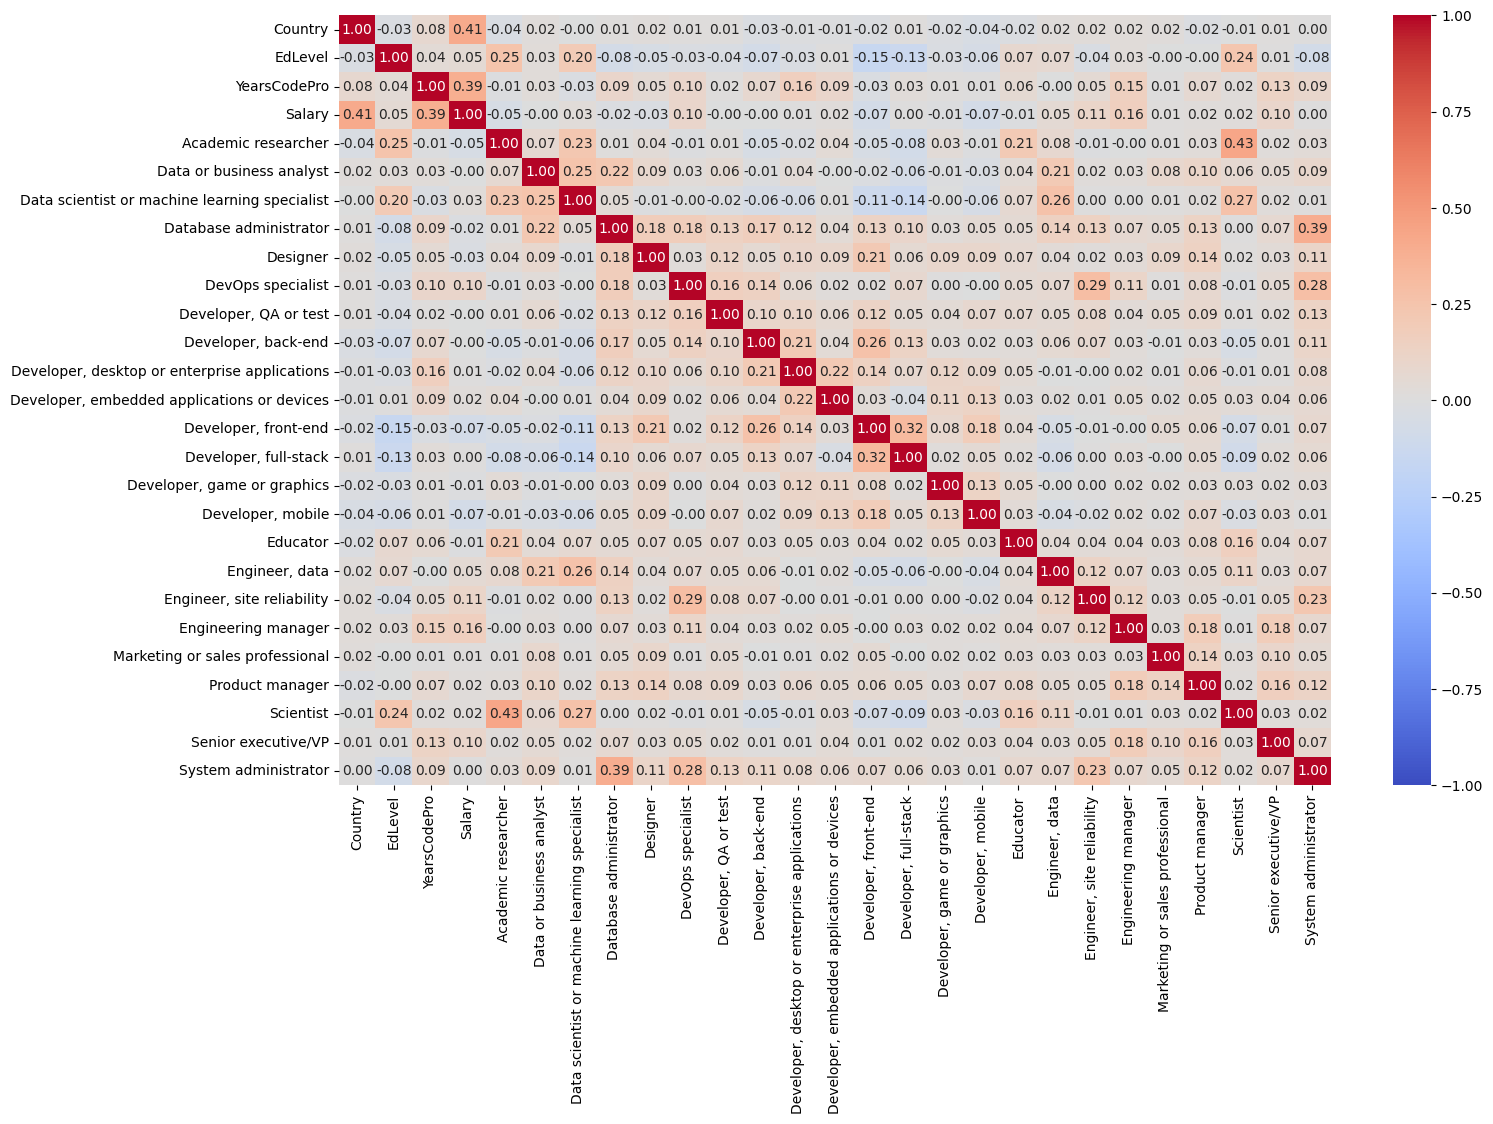

In [283]:
# correlação
plt.figure(figsize=(16, 10))
corr = df_filtered.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmax=1, vmin=-1)  

In [284]:
pickle.dump(ord_country, open('artefatos/ord_country.pkl', 'wb'))
pickle.dump(ord_ed_level, open('artefatos/ord_ed_level.pkl', 'wb'))

#### Separação e padronização

In [285]:
X = df_filtered.drop('Salary', axis=1)
y = df_filtered['Salary']

In [286]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [287]:
scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

In [288]:
pickle.dump(scaler, open('artefatos/scaler.pkl', 'wb'))

### Modelagem preditiva

##### Versão 1

In [289]:
# instanciando o modelo
modelo_linear = LinearRegression()

In [290]:
# treinando o modelo
modelo_linear.fit(X_treino_scaled, y_treino)

# coeeficientes
print('coeficientes: \n', modelo_linear.coef_)
print('intercept: \n', modelo_linear.intercept_)

# hiperparametros
print('hiperparametros ', modelo_linear.get_params())

coeficientes: 
 [17623.96914192  1786.79484894 16576.48179622 -2416.59055848
 -1000.77493777  1603.19176354 -2436.67084845 -1688.39738606
  2349.44657581  -394.19726878  -312.00525362 -1327.00923047
   295.97343454  -903.21803403   493.59188372   496.26470653
 -2047.25433626  -696.90160963  1471.19984394  3256.04666761
  3960.66993904   317.41403297  -234.43064781   889.43685702
  1504.83943709 -1504.50055499]
intercept: 
 64476.52003532912
hiperparametros  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [291]:
# predição
y_pred = modelo_linear.predict(X_teste_scaled)

In [292]:
# métricas

# quanto menor o MAE, RMSE e RMSLE melhor
print('MAE: ', mean_absolute_error(y_teste, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_teste, y_pred)))
print('RMSLE: ' , np.log(np.sqrt(mean_squared_error(y_teste, y_pred))))

# quanto maior o R2 melhor
print('R2 score: ', r2_score(y_teste, y_pred))

MAE:  29952.189544215802
RMSE:  39011.20718562158
RMSLE:  10.57160424756462
R2 score:  0.328067200821758


#### Versão 2

In [293]:
# instanciando o modelo
modelo_dtr = DecisionTreeRegressor(random_state=1)

In [294]:
modelo_dtr.fit(X_treino_scaled, y_treino)

DecisionTreeRegressor(random_state=1)

In [295]:
y_pred = modelo_dtr.predict(X_teste_scaled)

# metricas
print('MAE: ', mean_absolute_error(y_teste, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_teste, y_pred)))
print('RMSLE: ' , np.log(np.sqrt(mean_squared_error(y_teste, y_pred))))
print('R2 score: ', r2_score(y_teste, y_pred))

MAE:  24947.00203767575
RMSE:  38068.19289912334
RMSLE:  10.547134380404449
R2 score:  0.36015970894888183


#### Versão 3

In [296]:
modelo_rdfr = RandomForestRegressor(random_state=1)

In [297]:
modelo_rdfr.fit(X_treino_scaled, y_treino)

RandomForestRegressor(random_state=1)

In [298]:
y_pred = modelo_rdfr.predict(X_teste_scaled)

In [299]:
# metricas
print('MAE: ', mean_absolute_error(y_teste, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_teste, y_pred)))
print('RMSLE: ' , np.log(np.sqrt(mean_squared_error(y_teste, y_pred))))
print('R2 score: ', r2_score(y_teste, y_pred))

MAE:  19863.329054154474
RMSE:  29683.777122125117
RMSLE:  10.298355950711382
R2 score:  0.6109679462562099


#### GridSearch

In [300]:
max_depth = [None, 6, 8, 10]
n_estimators = [100, 200, 300]
min_samples_leaf = [3, 5]
parameters = {
    'max_depth': max_depth,
    'n_estimators': n_estimators,
    'min_samples_leaf': min_samples_leaf
}

In [301]:
modelo_rdfr_grid = RandomForestRegressor(random_state=1)

In [302]:
# cria grid
grid = GridSearchCV(modelo_rdfr_grid, parameters, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

In [303]:
grid.fit(X_treino_scaled, y_treino)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [None, 6, 8, 10],
                         'min_samples_leaf': [3, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [304]:
modelo_rdfr_grid = grid.best_estimator_

In [305]:
modelo_rdfr_grid.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [306]:
modelo_rdfr_grid.fit(X_treino_scaled, y_treino)

RandomForestRegressor(min_samples_leaf=5, n_estimators=300, random_state=1)

In [307]:
y_pred = modelo_rdfr_grid.predict(X_teste_scaled)

In [309]:
# metricas
print('MAE: ', mean_absolute_error(y_teste, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_teste, y_pred)))
print('RMSLE: ' , np.log(np.sqrt(mean_squared_error(y_teste, y_pred))))
print('R2 score: ', r2_score(y_teste, y_pred))

MAE:  18297.66676437759
RMSE:  27803.99335489383
RMSLE:  10.23293493522214
R2 score:  0.6586802539602479


In [310]:
pickle.dump(modelo_rdfr_grid, open('artefatos/modelo_rdfr_grid.pkl', 'wb'))